In [60]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()

df = pd.read_csv('lis_inequality.csv')
df = df[df['Year']>1980]

df.head()

,Entity,Code,Year,Market Income,Disposable Income
0,Australia,AUS,1981,0.405,0.282
1,Australia,AUS,1985,0.440,0.293
2,Australia,AUS,1989,0.440,0.304
3,Australia,AUS,1995,0.483,0.311
4,Australia,AUS,2001,0.498,0.320


In [61]:
liberal = ['AUS','CAN','USA','GBR','IRL','NZL','CHE']
conservative = ['DEU','AUT','BEL','FRA','NLD','ITA','JPN']
socdem = ['SWE','DNK','NOR','FIN']

table = pd.DataFrame(index=['Liberal','Conservative','Social democratic'],columns=pd.MultiIndex.from_product([['Market Income','Disposable Income'],['Mean','SD']]))



table.loc['Liberal',('Market Income','Mean')] = df.loc[df['Code'].isin(liberal),'Market Income'].mean()
table.loc['Conservative',('Market Income','Mean')] = df.loc[df['Code'].isin(conservative),'Market Income'].mean()
table.loc['Social democratic',('Market Income','Mean')] = df.loc[df['Code'].isin(socdem),'Market Income'].mean()

table.loc['Liberal',('Market Income','SD')] = df.loc[df['Code'].isin(liberal),'Market Income'].std()
table.loc['Conservative',('Market Income','SD')] = df.loc[df['Code'].isin(conservative),'Market Income'].std()
table.loc['Social democratic',('Market Income','SD')] = df.loc[df['Code'].isin(socdem),'Market Income'].std()

table.loc['Liberal',('Disposable Income','Mean')] = df.loc[df['Code'].isin(liberal),'Disposable Income'].mean()
table.loc['Conservative',('Disposable Income','Mean')] = df.loc[df['Code'].isin(conservative),'Disposable Income'].mean()
table.loc['Social democratic',('Disposable Income','Mean')] = df.loc[df['Code'].isin(socdem),'Disposable Income'].mean()

table.loc['Liberal',('Disposable Income','SD')] = df.loc[df['Code'].isin(liberal),'Disposable Income'].std()
table.loc['Conservative',('Disposable Income','SD')] = df.loc[df['Code'].isin(conservative),'Disposable Income'].std()
table.loc['Social democratic',('Disposable Income','SD')] = df.loc[df['Code'].isin(socdem),'Disposable Income'].std()

table = table.stack(0).unstack()
table

Mean                              SD  \
                  Disposable Income Market Income Disposable Income   
Liberal                    0.325457      0.491881         0.0314994   
Conservative               0.288436      0.473333         0.0360342   
Social democratic          0.239593      0.450519         0.0212064   

                                 
                  Market Income  
Liberal               0.0430123  
Conservative          0.0305591  
Social democratic      0.034137

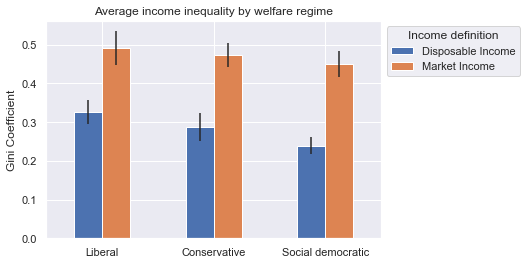

In [77]:
table['Mean'].plot.bar(yerr=table['SD'])
plt.xticks(rotation=0)
plt.ylabel('Gini Coefficient')
plt.legend(loc='upper left',title='Income definition',bbox_to_anchor=(1,1))
plt.title('Average income inequality by welfare regime')
plt.savefig('welfare_regime_inequality.png',bbox_inches='tight')

In [71]:
df['regime'] = df['Code'].replace(liberal+conservative+socdem,7*['liberal']+7*['conservative']+4*['social democratic'])

df = df[df['regime'].isin(['liberal','conservative','social democratic'])]
df['regime'] = df['regime'].astype('category')
df['regime'] = df['regime'].cat.reorder_categories(['liberal','conservative','social democratic'])
df['posttax'] = df['Disposable Income']
df['pretax'] = df['Market Income']

df.head()

,Entity,Code,Year,Market Income,Disposable Income,regime,posttax,pretax
0,Australia,AUS,1981,0.405,0.282,liberal,0.282,0.405
1,Australia,AUS,1985,0.440,0.293,liberal,0.293,0.440
2,Australia,AUS,1989,0.440,0.304,liberal,0.304,0.440
3,Australia,AUS,1995,0.483,0.311,liberal,0.311,0.483
4,Australia,AUS,2001,0.498,0.320,liberal,0.320,0.498


In [82]:
import statsmodels.formula.api as smf

res = smf.ols('posttax ~ pretax + regime',data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                posttax   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     77.72
Date:                Wed, 22 Jan 2020   Prob (F-statistic):           1.87e-26
Time:                        21:25:32   Log-Likelihood:                 242.61
No. Observations:                 108   AIC:                            -477.2
Df Residuals:                     104   BIC:                            -466.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.1153      0.034      3.360      0.001       0.047       0.183
regime[T.conservative]         -0.0324      0.006     -5.460      0.000      -0.044      -0.021
regime[T.social democratic]    -0.0714      0.007    -10.133      0.000      -0.085      -0.057
pretax                          0.4343      0.069      6.266      0.000       0.297       0.572
==============================================================================
Omnibus:                        1.829   Durbin-Watson:                   0.689
Prob(Omnibus):                  0.401   Jarque-Bera (JB):                1.869
Skew:                           0.296   Prob(JB):                        0.393
Kurtosis:                       2.748   Cond. No.                         36.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
from linearmodels import BetweenOLS

data = df.set_index(['Code','Year'])

mod = BetweenOLS.from_formula('posttax ~ 1 + pretax + regime',data=data.dropna()).fit()
mod.summary

Dep. Variable:,posttax,R-squared:,0.7660
Estimator:,BetweenOLS,R-squared (Between):,0.7660
No. Observations:,15,R-squared (Within):,0.4608
Date:,"Wed, Jan 22 2020",R-squared (Overall):,0.6838
Time:,21:28:19,Log-likelihood,37.466
Cov. Estimator:,Unadjusted,,
,,F-statistic:,12.002
Entities:,16,P-value,0.0009
Avg Obs:,6.7500,Distribution:,"F(3,11)"
Min Obs:,0.0000,,
Max Obs:,11.000,F-statistic (robust):,12.002
